Number Identification Deep Learning Model

In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

Here we are getting the training and the testing data

In [3]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

To find the lenght of the training dataset and testing dataset

In [4]:
len(X_train) #lenght of training dataset

60000

In [5]:
len(X_test) #lenght of testing dataset

10000

to find the shape of the array of individual sample

In [6]:
X_train[0].shape

(28, 28)

To get the values of the individual sample

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

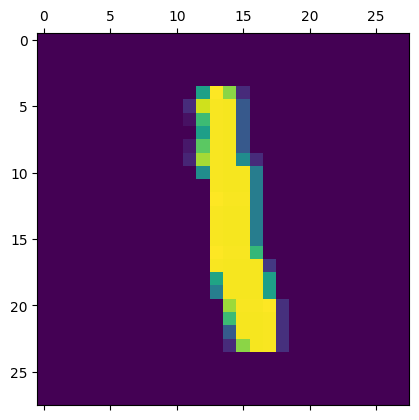

In [8]:
plt.matshow(X_train[6])

In [9]:
y_train[:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

Here we are scaling the values between 0 and 1 so we  can train the model with better accuracy

In [15]:
X_train = X_train/255
X_test = X_test/255

Here we are converting the 2-D array to 1-D array, we use the function reshape to do that. The output will be the lenght of the X_train and the 28*28(which is the 2-D array of the data set) 

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Since we have a stack of layers in the neural network (here we have 28*28 layers) we use Keras.Sequential. Since it is a stack it will accept every layer as a one element. Keras has a API which is keras.layers.Dense (here dense means every neuron in the 1st layer is connected to the every neuron in the second layer). The model is trained on the traiing dataset

In [19]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']          
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\Users\d33f\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8143 - loss: 0.7175
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9135 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2911
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9249 - loss: 0.2693
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9276 - loss: 0.2616


here we will check the accuracy for the test dataset

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9143 - loss: 0.3016


[0.2670704424381256, 0.9251999855041504]

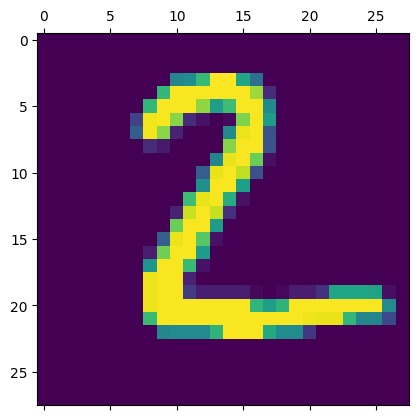

In [25]:
plt.matshow(X_test[1])

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.1249982e-01, 8.1322286e-03, 9.9924403e-01, 3.7677985e-01,
       7.5953416e-10, 7.5521755e-01, 9.1394830e-01, 7.7545945e-13,
       1.4233999e-01, 3.1295144e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

np.int64(2)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   11,  923,   16,   10,    3,   13,   10,   35,    4],
       [   3,    1,   21,  919,    0,   21,    2,   11,   22,   10],
       [   2,    2,    4,    1,  924,    0,    7,    4,    8,   30],
       [  11,    3,    2,   33,   11,  767,   17,    6,   34,    8],
       [  13,    3,    5,    1,    7,   12,  913,    2,    2,    0],
       [   1,   11,   22,    8,    9,    1,    0,  938,    2,   36],
       [   9,   14,    5,   19,    9,   23,   10,   12,  863,   10],
       [  11,    7,    1,   10,   28,    8,    0,   18,    4,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

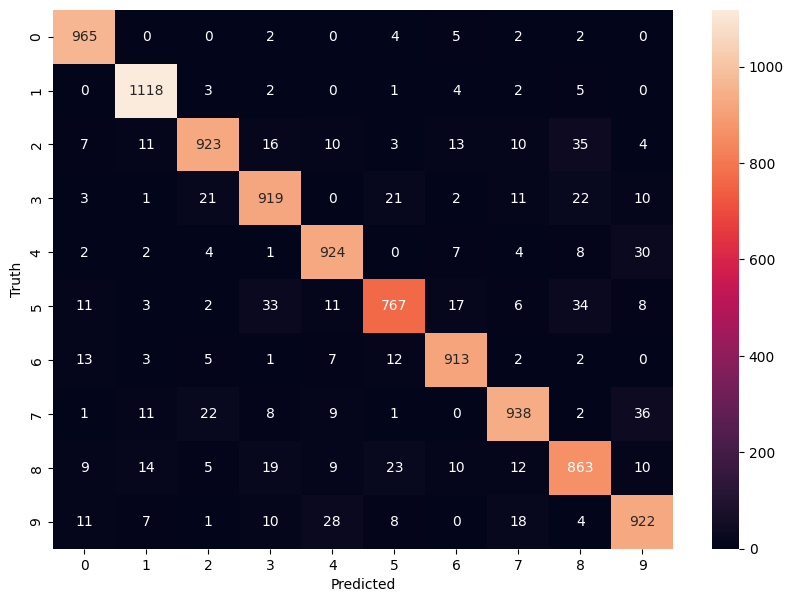

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']          
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8713 - loss: 0.4587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9617 - loss: 0.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9727 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9803 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9861 - loss: 0.0480


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

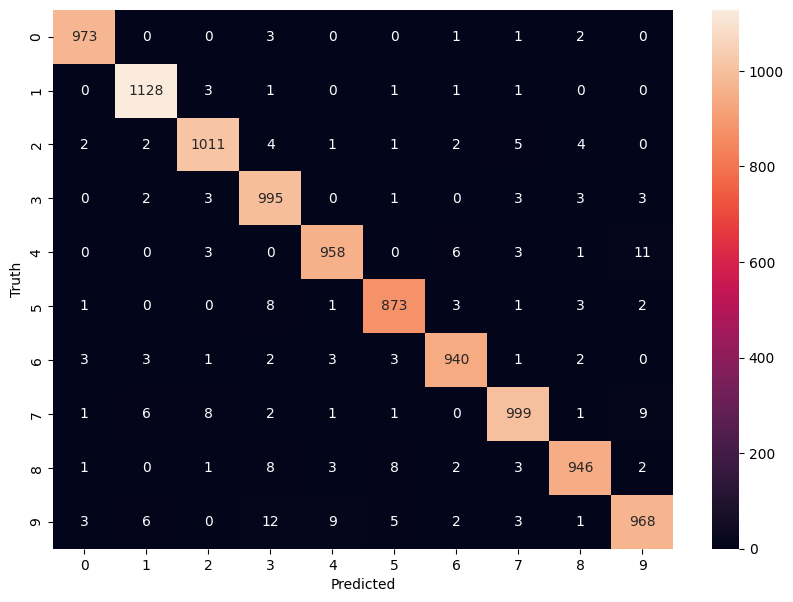

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']          
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8730 - loss: 0.4441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9625 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9741 - loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9789 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9837 - loss: 0.0528
